In [10]:
import os
import requests
import base64
import numpy as np\

# GK2A data processing module
from src.tools.clip import (
    GK2AFDProcessor,
)

In [34]:
proc = GK2AFDProcessor(resolution=2)

In [ ]:
lr_lon = 132
lr_lat = 33
ul_lon = 124
ul_lat = 43

In [105]:
url = "https://apiskt.60hz.io/gk2a/data?token=JqCgKwTCoGBU4jozIpopn3yNHRby4fwyskKOssM2WVo3rXBLgDgBmHClqxvd13Zu&variable=swrad&obs_datetime=202303200810&tz_info=Asia/Seoul"

In [106]:
res = requests.get(url)

In [107]:
data = res.json()
cur_data = data["ASR"]
result = np.frombuffer(
    base64.decodebytes(cur_data['data'].encode('utf8')),
    dtype=cur_data['dtype']
).reshape(cur_data['shape'])

In [108]:
arr = result.copy()

In [118]:
ul = tuple(map(np.floor, proc.rowcol_from_latlon(ul_lat, ul_lon)))

In [119]:
ul

(699.0, 2587.0)

In [110]:
lr = tuple(map(np.ceil, proc.rowcol_from_latlon(lr_lat, lr_lon)))

In [120]:
lr

(1081.0, 2923.0)

In [121]:
x = np.linspace(int(ul[1]),int(lr[1]), num=arr.shape[1]) # longitude
y = np.linspace(int(ul[0]),int(lr[0]), num=arr.shape[0]) # latitude

In [124]:
X, Y = np.meshgrid(x,y)
yy, xx = proc.latlon_from_rowcol(Y, X)

In [126]:
xx

array([[123.98433708, 124.01028427, 124.03622985, ..., 132.59664357,
        132.6226039 , 132.64856591],
       [123.98660386, 124.01253697, 124.03846849, ..., 132.59427862,
        132.62022485, 132.64617277],
       [123.98886555, 124.01478463, 124.04070212, ..., 132.59191896,
        132.61785113, 132.64378499],
       ...,
       [124.58858245, 124.61078707, 124.63299076, ..., 131.96628167,
        131.98849397, 132.01070726],
       [124.58969976, 124.61189747, 124.63409426, ..., 131.96511617,
        131.98732155, 132.00952792],
       [124.59081528, 124.6130061 , 124.63519599, ..., 131.96395253,
        131.986151  , 132.00835047]])

In [125]:
yy

array([[43.00585392, 43.00557662, 43.00530104, ..., 43.00783555,
        43.0081266 , 43.00841938],
       [42.97641768, 42.97614085, 42.97586574, ..., 42.97839596,
        42.97868652, 42.97897881],
       [42.94700294, 42.94672657, 42.94645192, ..., 42.94897787,
        42.94926795, 42.94955974],
       ...,
       [33.03220336, 33.032043  , 33.03188363, ..., 33.03334919,
        33.03351748, 33.03368676],
       [33.00831334, 33.00815319, 33.00799403, ..., 33.00945771,
        33.00962578, 33.00979484],
       [32.98443325, 32.9842733 , 32.98411434, ..., 32.98557616,
        32.98574401, 32.98591286]])

## draw on basemap

In [113]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
data.keys()

dict_keys(['RSR', 'DSR', 'ASR', 'obs_datetime_utc'])

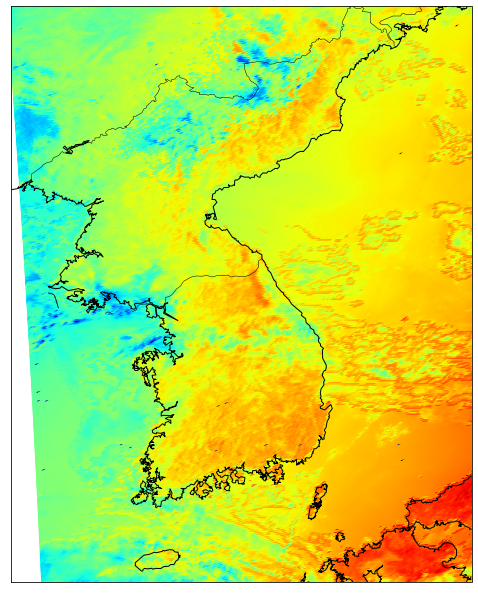

In [127]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

m = Basemap(
    llcrnrlon=ul_lon,
    llcrnrlat=lr_lat,
    urcrnrlon=lr_lon,
    urcrnrlat=ul_lat,
    # rsphere=(6378137.00, 6356752.3142),
    resolution='i',
    # area_thresh=1000.,
    epsg=4326,
    lat_0=37.35,
    lon_0=126.58,
    ax=ax
)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
xx_m, yy_m = m(xx, yy)
m.scatter(xx_m, yy_m, c=arr, cmap='jet', vmin=0)
plt.show()